In [1]:
from gensim.models.word2vec import Word2Vec

In [2]:
import re
from sklearn import feature_extraction 
stop_words = feature_extraction.text.ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

def preprocess(text):
  text = text.lower() #lowercase
  text = re.sub(r'[^\w\s]', '', text) #remove punctuations
  text = re.sub(r'\d+', '', text) #remove numbers
  text = " ".join(text.split()) #stripWhitespace
  text = text.split()
  text = [x for x in text if x not in stop_words] #remove stopwords
  text = [x for x in text if x not in ["dr", "doctor"]] #remove task specific stopwords
  text = " ".join(text)
  # stemmer_ps = PorterStemmer()  
  # text = [stemmer_ps.stem(word) for word in text.split()] #stemming
  # text = " ".join(text)
  # lemmatizer = WordNetLemmatizer()
  # text = [lemmatizer.lemmatize(word) for word in text.split()]  #lemmatization
  # text = " ".join(text)
  return(text)

In [3]:
import pandas as pd
data = pd.read_csv('nykaa_data.csv')

In [4]:
data['review_processed']=data['review_text'].apply(lambda x:preprocess(str(x)))
data['review_processed']=data['review_processed'].apply(lambda x:x.split())


In [5]:
data

,product_id,brand_name,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_tags,product_url,review_processed
0,781070,Olay,16752142,Worth buying 50g one,Works as it claims. Could see the difference f...,Ashton Dsouza,2021-01-23 15:17:18,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...,"[works, claims, difference, day, use, olay, cl..."
1,781070,Olay,14682550,Best cream to start ur day,It does what it claims . Best thing is it smoo...,Amrit Neelam,2020-09-07 15:30:42,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...,"[does, claims, best, thing, smoothens, ur, ski..."
2,781070,Olay,15618995,perfect for summers dry for winters,I have been using this product for months now....,Sanchi Gupta,2020-11-13 12:24:14,4.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...,"[using, product, months, perfect, combination,..."
3,781070,Olay,13474509,Not a moisturizer,"i have an oily skin, while this whip acts as a...",Ruchi Shah,2020-06-14 11:56:50,3.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...,"[oily, skin, whip, acts, great, base, primer, ..."
4,781070,Olay,16338982,Average,It's not that good. Please refresh try for oth...,Sukanya Sarkar,2020-12-22 15:24:35,2.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...,"[good, refresh, try, products]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61279,1044490,Herbal Essences,17769058,Good,I use this thrice a week. Has helped me in mak...,Radhesh,2021-04-12 13:28:41,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512,FEATURED,https://www.nykaa.com/herbal-essences-potent-a...,"[use, thrice, week, helped, making, hair, smoo..."
61280,1044490,Herbal Essences,17766838,Great,This shampoo has a amazing fragnance and textu...,Shalini Sirohi,2021-04-12 11:47:07,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512,FEATURED,https://www.nykaa.com/herbal-essences-potent-a...,"[shampoo, amazing, fragnance, texture, just, l..."
61281,1044490,Herbal Essences,17765866,Really mild and nice,"Used it for the first time, feels really fresh...",Sana kanted,2021-04-12 10:58:34,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512,FEATURED,https://www.nykaa.com/herbal-essences-potent-a...,"[used, time, feels, really, fresh, using, itch..."
61282,1044490,Herbal Essences,17761057,Amazing product!,One of the best shampoo which are sulphate and...,neeru chouhan,2021-04-11 21:44:55,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512,FEATURED,https://www.nykaa.com/herbal-essences-potent-a...,"[best, shampoo, sulphate, paraben, free, makes..."


In [6]:
model = Word2Vec(sentences=data['review_processed'].tolist(), vector_size=100, sg=1,min_count=5,window=5,workers=50,seed=10,epochs=50)
#vector_size (int, optional) – Dimensionality of the word vectors.
#min_count (int, optional) – Ignores all words with total frequency lower than this.
#window (int, optional) – Maximum distance between the current and predicted word within a sentence.
#workers (int, optional) – Use these many worker threads to train the model (=faster training with multicore machines).
#sg ({0, 1}, optional) – Training algorithm: 1 for skip-gram; otherwise CBOW.
#epochs (int, optional) – Number of iterations (epochs) over the corpus. (Formerly: iter)

#The meaning of most of the parameters are beyond the scope of this class. If interested, please check the official documentations: https://radimrehurek.com/gensim/models/word2vec.html

Be patient! This took ~6min for worker=50, ~9min for worker=25.

Replace the 80k data with a smaller one if you encounter errors for multiple times!! (or increase min_count, or decrease vector_size, or decrease window, or decrease epochs)

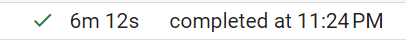

image.png

In [7]:
model.save('w2v_dr.w2v')

In [8]:
model=Word2Vec.load('w2v_dr.w2v')

In [9]:
vocab = model.wv.index_to_key

In [10]:
len(vocab)

4831

In [11]:
model.wv.most_similar('foundation', topn=10)

[('dewy', 0.6800746917724609),
 ('foundations', 0.6148651242256165),
 ('concealer', 0.5820146203041077),
 ('compact', 0.5759224891662598),
 ('cakey', 0.5718681216239929),
 ('y', 0.5710717439651489),
 ('glow', 0.5689124464988708),
 ('moisturizer', 0.5665680170059204),
 ('coverage', 0.5527960658073425),
 ('skin', 0.5463433265686035)]

In [12]:
model.wv.most_similar('concealer', topn=25)

[('corrector', 0.6107832789421082),
 ('undereye', 0.6062320470809937),
 ('concealing', 0.6012243032455444),
 ('conceal', 0.5843921899795532),
 ('foundation', 0.5820146203041077),
 ('circles', 0.5639752149581909),
 ('concealers', 0.5503706932067871),
 ('coverage', 0.54736328125),
 ('concealor', 0.5471733212471008),
 ('blemishes', 0.5312806367874146),
 ('undereyes', 0.5103650689125061),
 ('sheer', 0.4964306950569153),
 ('correctors', 0.4843342900276184),
 ('circle', 0.48339858651161194),
 ('cakey', 0.4804217219352722),
 ('stick', 0.47806549072265625),
 ('bake', 0.47688937187194824),
 ('spots', 0.47552648186683655),
 ('creams', 0.4742962718009949),
 ('conceals', 0.4738861918449402),
 ('device', 0.4702950417995453),
 ('rewind', 0.46815454959869385),
 ('cancel', 0.4633055031299591),
 ('bb', 0.461148738861084),
 ('primer', 0.45602986216545105)]

In [13]:
model.wv.similarity('concealer', 'undereye')

0.6062319

In [14]:
model.wv.similarity('concealer', 'face')

0.39219534

In [15]:
model.wv.similarity('concealer', 'matte')

0.20782784

In [16]:
model.wv.similarity('concealer', 'dewy')

0.39962053

In [17]:
model.wv.similarity('concealer', 'primer')

0.4560299

In [18]:
v_concealer = model.wv['concealer']
v_undereye = model.wv['undereye']
v_dewy = model.wv['dewy']
v_primer = model.wv['primer']
best_product = v_concealer + v_undereye + v_dewy + v_primer
numpy.dot(best_product, v_concealer)/(numpy.linalg.norm(best_product)* numpy.linalg.norm(v_concealer))

NameError: name 'numpy' is not defined

In [19]:
model.wv.vectors.shape

(4831, 100)

In [20]:
outdata=pd.DataFrame(model.wv.vectors)

In [21]:
outdata

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.316187,0.049514,0.206763,-0.119105,0.326776,-0.125381,-0.282285,-0.240996,-0.003556,-0.086935,...,-0.424474,-0.336053,-0.120556,-0.210660,-0.296452,-0.071926,0.323651,-0.214362,-0.019971,-0.051319
1,0.155609,0.063154,0.164557,-0.075478,0.247335,-0.069691,-0.143217,-0.352144,0.115454,0.243134,...,-0.101966,-0.236431,0.051185,-0.069436,-0.041700,-0.023309,-0.016819,0.019483,-0.022373,0.035710
2,0.308844,0.179375,0.134553,-0.038158,0.407676,-0.210557,-0.339016,-0.068386,0.035411,-0.296226,...,0.292106,0.241155,0.464883,0.016887,-0.138528,-0.748037,-0.067388,0.030198,-0.040071,-0.069189
3,0.056126,-0.171878,0.317603,-0.169018,0.266090,0.102808,-0.165429,-0.326918,-0.008945,-0.025551,...,-0.471043,0.093756,-0.024552,0.282684,0.097457,-0.181646,0.238621,0.123769,-0.202144,-0.106198
4,0.056376,-0.456575,-0.059696,-0.187609,0.101065,-0.384291,0.168362,-0.622749,0.484108,0.194569,...,-0.421895,-0.157944,-0.087066,-0.566641,0.130732,-0.384845,0.138948,-0.197073,0.079606,0.506935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4826,0.153675,-0.128227,0.389378,0.296427,0.198430,0.380162,-0.032096,-0.253445,0.083625,0.305902,...,-0.452714,0.496468,0.246594,-0.011289,0.612702,-0.035005,0.031468,0.316056,0.399960,-0.466437
4827,0.278672,-0.114127,-0.008159,0.226817,-0.116925,0.249746,-0.243554,-0.142150,0.823476,0.553841,...,-0.553111,0.309509,0.250789,-0.327922,-0.170452,-0.313374,0.516757,-0.061867,0.396164,0.584343
4828,0.480594,-0.070924,0.055278,-0.091534,0.602793,-0.170807,-0.861144,-0.669043,-0.240228,-0.804099,...,-0.576094,-0.492281,-0.065613,-0.292435,0.113133,-0.258826,-0.041425,-0.046141,0.241403,-0.139459
4829,0.026044,0.144720,0.063075,-0.299240,0.818220,0.286781,-0.102092,-0.388349,0.353715,-0.166429,...,-0.543094,-0.290631,-0.323527,-0.028763,-0.592306,0.213557,0.140229,0.245256,0.038451,-0.490858


In [22]:
outdata.to_csv('word2vec_data.tsv',sep='\t',index=False,header=False)

In [23]:
pd.DataFrame(model.wv.index_to_key).to_csv('word2vec_data_words.tsv',sep='\t',index=False,header=False)

In [ ]:
https://projector.tensorflow.org/
